In [1]:
import urllib
from urllib import request
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import os
import sys
import json
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
import zipfile

In [2]:
url = 'https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD'
tonn = pd.read_csv(url)

In [3]:
tonn.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1990 / 08,Manhattan,3,3258.3,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1990 / 10,Manhattan,3,3829.9,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
tonn.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

In [5]:
tonn.MONTH.unique()

array(['1990 / 08', '1990 / 10', '1990 / 11', '1990 / 12', '1991 / 01',
       '1991 / 02', '1991 / 03', '1991 / 04', '1991 / 05', '1991 / 06',
       '1991 / 07', '1991 / 08', '1991 / 09', '1991 / 10', '1991 / 11',
       '1991 / 12', '1992 / 01', '1992 / 02', '1992 / 03', '1992 / 04',
       '1992 / 05', '1992 / 06', '1992 / 07', '1992 / 08', '1992 / 09',
       '1992 / 10', '1992 / 11', '1992 / 12', '1993 / 01', '1993 / 02',
       '1993 / 03', '1993 / 04', '1993 / 05', '1993 / 06', '1993 / 07',
       '1993 / 08', '1993 / 09', '1993 / 10', '1993 / 11', '2002 / 11',
       '1993 / 12', '1994 / 01', '1994 / 02', '1994 / 03', '1994 / 04',
       '1994 / 05', '1994 / 06', '1994 / 07', '1994 / 08', '1994 / 09',
       '1994 / 10', '1994 / 11', '1994 / 12', '1995 / 01', '1995 / 02',
       '1995 / 03', '1995 / 04', '1995 / 05', '1995 / 06', '1995 / 07',
       '1995 / 08', '1995 / 09', '1995 / 10', '1995 / 11', '1995 / 12',
       '1996 / 01', '1996 / 02', '1996 / 03', '1996 / 04', '1996

In [6]:
tonn=tonn.drop([
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS'], axis=1)
tonn.count()

MONTH                  19750
BOROUGH                19750
COMMUNITYDISTRICT      19750
REFUSETONSCOLLECTED    19750
PAPERTONSCOLLECTED     17128
MGPTONSCOLLECTED       16840
RESORGANICSTONS          992
XMASTREETONS            1361
BOROUGH_ID             19750
dtype: int64

In [7]:
tonn.sort_values(by='MONTH').reset_index()

,index,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,XMASTREETONS,BOROUGH_ID
0,12405,1990 / 01,Manhattan,3,24.4,NaN,NaN,NaN,NaN,1
1,9979,1990 / 01,Queens,12,8.4,NaN,NaN,NaN,NaN,4
2,17307,1990 / 01,Staten Island,2,39.1,NaN,NaN,NaN,NaN,5
3,4926,1990 / 06,Staten Island,2,3485.8,NaN,NaN,NaN,NaN,5
4,7428,1990 / 06,Staten Island,3,4242.2,NaN,NaN,NaN,NaN,5
5,7429,1990 / 06,Staten Island,1,3790.0,NaN,NaN,NaN,NaN,5
6,4927,1990 / 07,Staten Island,2,4662.2,NaN,NaN,NaN,NaN,5
7,14850,1990 / 07,Staten Island,3,5377.9,NaN,NaN,NaN,NaN,5
8,17308,1990 / 07,Staten Island,1,5203.7,NaN,NaN,NaN,NaN,5
9,0,1990 / 08,Manhattan,3,3258.3,NaN,NaN,NaN,NaN,1


In [8]:
tonn.iloc[19575,:2]

MONTH      2017 / 01
BOROUGH     Brooklyn
Name: 19575, dtype: object

In [9]:
tonn.iloc[19574,:2]

MONTH      2016 / 12
BOROUGH       Queens
Name: 19574, dtype: object

In [10]:
# The original plot was based on 2017/09 to 2018/09
# Dropping rows
tonn = tonn.drop(tonn.index[0:19575])
tonn.MONTH.unique()

array(['2017 / 01', '2017 / 02', '2017 / 03', '2017 / 04', '2017 / 05',
       '2017 / 06', '2017 / 07', '2017 / 08', '2017 / 09', '2017 / 10',
       '2017 / 11', '2017 / 12', '2018 / 01', '2018 / 02', '2018 / 03',
       '2018 / 04', '2018 / 05', '2018 / 06', '2018 / 07', '2018 / 08',
       '2018 / 09', '2018 / 10', '2018 / 11'], dtype=object)

In [11]:
## Drop 2018 Oct and nov

tonn = tonn.drop(tonn[tonn.MONTH=='2018 / 10'].index)

tonn = tonn.drop(tonn[tonn.MONTH=='2018 / 11'].index)

In [12]:
# Splitting data for 5 boroughs

tonn_mn=tonn[tonn.BOROUGH=='Manhattan'].reset_index()
tonn_bk=tonn[tonn.BOROUGH=='Brooklyn'].reset_index()
tonn_qns=tonn[tonn.BOROUGH=='Queens'].reset_index()
tonn_si=tonn[tonn.BOROUGH=='Staten Island'].reset_index()
tonn_bx=tonn[tonn.BOROUGH=='Bronx'].reset_index()

In [13]:
tonn_mn.head()

,index,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,XMASTREETONS,BOROUGH_ID
0,19577,2017 / 01,Manhattan,4,2295.1,438.9,365.7,NaN,40.5,1
1,19578,2017 / 01,Manhattan,7,5056.7,1165.5,806.0,17.7,93.9,1
2,19582,2017 / 01,Manhattan,5,1298.4,272.9,181.2,NaN,28.0,1
3,19583,2017 / 01,Manhattan,6,2855.2,504.6,393.3,14.3,39.5,1
4,19584,2017 / 02,Manhattan,2,1745.8,389.9,294.9,NaN,NaN,1


In [14]:
# Manhattan Data:
paper_mn=tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()
gm_mn=tonn_mn.groupby('MONTH')['MGPTONSCOLLECTED'].sum()
trash_mn=tonn_mn.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()

In [15]:
# Brooklyn Data:
paper_bk=tonn_bk.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()
gm_bk=tonn_bk.groupby('MONTH')['MGPTONSCOLLECTED'].sum()
trash_bk=tonn_bk.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()

In [16]:
# Queens Data:
paper_qns=tonn_qns.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()
gm_qns=tonn_qns.groupby('MONTH')['MGPTONSCOLLECTED'].sum()
trash_qns=tonn_qns.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()

In [17]:
# Staten Island Data:
paper_si=tonn_si.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()
gm_si=tonn_si.groupby('MONTH')['MGPTONSCOLLECTED'].sum()
trash_si=tonn_si.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()

In [18]:
# Bronx Data:
paper_bx=tonn_bx.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()
gm_bx=tonn_bx.groupby('MONTH')['MGPTONSCOLLECTED'].sum()
trash_bx=tonn_bx.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()

In [19]:
# Import population data
url_p='https://data.cityofnewyork.us/api/views/xywu-7bv9/rows.csv?accessType=DOWNLOAD'
pop=pd.read_csv(url_p)

In [20]:
pop.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73


In [21]:
pop.columns

Index(['Age Group', 'Borough', '1950', '1950 - Boro share of NYC total',
       '1960', '1960 - Boro share of NYC total', '1970',
       '1970 - Boro share of NYC total', '1980',
       '1980 - Boro share of NYC total', '1990',
       '1990 - Boro share of NYC total', '2000',
       '2000 - Boro share of NYC total', '2010',
       '2010 - Boro share of NYC total', '2020',
       '2020 - Boro share of NYC total', '2030',
       '2030 - Boro share of NYC total', '2040',
       '2040 - Boro share of NYC total'],
      dtype='object')

In [22]:
# We are only interested in the year that is the closest to the tonnage data year so deleting others.
# Keeping 2010 data
pop = pop.drop(['Age Group', '1950', '1950 - Boro share of NYC total',
       '1960', '1960 - Boro share of NYC total', '1970',
       '1970 - Boro share of NYC total', '1980',
       '1980 - Boro share of NYC total', '1990',
       '1990 - Boro share of NYC total', '2000',
       '2000 - Boro share of NYC total', '2020',
       '2020 - Boro share of NYC total', '2030',
       '2030 - Boro share of NYC total', '2040',
       '2040 - Boro share of NYC total'], axis=1)

In [23]:
pop.head()

,Borough,2010,2010 - Boro share of NYC total
0,NYC Total,8242624,100.00
1,Bronx,1385108,16.80
2,Brooklyn,2552911,30.97
3,Manhattan,1585873,19.24
4,Queens,2250002,27.30


In [24]:
pop.groupby('Borough')['2010'].sum()

Borough
   Bronx            1385108
   Brooklyn         2552911
   Manhattan        1585873
   Queens           2250002
   Staten Island     468730
NYC Total           8242624
Name: 2010, dtype: int64

In [25]:
pop_mn=pop.groupby('Borough')['2010'].sum()[2]
pop_bk=pop.groupby('Borough')['2010'].sum()[1]
pop_qns=pop.groupby('Borough')['2010'].sum()[3]
pop_si=pop.groupby('Borough')['2010'].sum()[4]
pop_bx=pop.groupby('Borough')['2010'].sum()[0]

In [26]:
# Manhattan Data:
re_mn_pc=(tonn_mn['PAPERTONSCOLLECTED'].sum()+tonn_mn['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[2]
trash_mn_pc=tonn_mn['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[2]

In [27]:
# Brooklyn Data:
re_bk_pc=(tonn_bk['PAPERTONSCOLLECTED'].sum()+tonn_bk['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[1]
trash_bk_pc=tonn_bk['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[1]

In [28]:
# Queens Data:
re_qns_pc=(tonn_qns['PAPERTONSCOLLECTED'].sum()+tonn_qns['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[3]

trash_qns_pc=tonn_qns['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[3]

In [29]:
# Staten Island Data:
re_si_pc=(tonn_si['PAPERTONSCOLLECTED'].sum()+tonn_si['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[4]
trash_si_pc=tonn_si['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[4]

In [30]:
# Bronx Data:
re_bx_pc=(tonn_bx['PAPERTONSCOLLECTED'].sum()+tonn_bx['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[0]
trash_bx_pc=tonn_bx['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[0]
re_bx_pc

0.014119620997063043

In [31]:
# Putting into a pandas table
data = {'Borough': ['Bronx','Staten Island', 'Queens', 'Brooklyn', 'Manhattan'],
        'Annual Recycled Material per capita(kg)': [re_bx_pc*1000, re_si_pc*1000, re_qns_pc*1000, re_bk_pc*1000
                                                    , re_mn_pc*1000],
        'Annual Trash per capita(kg)': [trash_bx_pc*1000, trash_si_pc*1000, trash_qns_pc*1000, 
                                        trash_bk_pc*1000, trash_mn_pc*1000]}
nyc = pd.DataFrame(data, columns = ['Borough', 'Annual Recycled Material per capita(kg)','Annual Trash per capita(kg)'])
nyc

,Borough,Annual Recycled Material per capita(kg),Annual Trash per capita(kg)
0,Bronx,14.119621,77.618713
1,Staten Island,22.893990,89.685533
2,Queens,17.239762,76.035444
3,Brooklyn,13.915996,64.845700
4,Manhattan,15.117100,50.472390


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


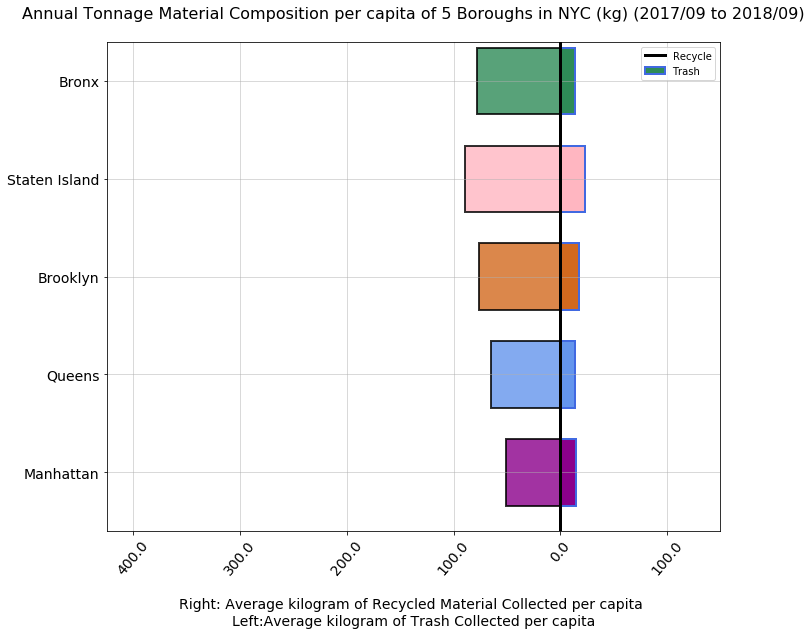

In [32]:
x1=nyc.ix[:4,1]
x2=nyc.ix[:4,2]
#y2=nyc.ix[1,1:]
#y3=nyc.ix[2,1:]
#y4=nyc.ix[3,1:]
#y5=nyc.ix[4,1:]

# Bar labels for each borough
bar_labels = ['Manhattan','Queens', 'Brooklyn', 'Staten Island', 'Bronx']

plt.figure(figsize=(11,9))

# Set the y position
y_pos = np.arange(len(x1))
plt.yticks(y_pos, bar_labels, fontsize=12)


width = 0.68

# Create a horizontal bar in the position y_pos
color_dict={'#2E8B57','#FFB6C1','#D2691E', '#6495ED', '#8B008B'}
bx=plt.barh(y_pos[4], x1[0], width, align='center', color='#2E8B57', linewidth=2, edgecolor='#4169E1')
si=plt.barh(y_pos[3], x1[1], width, align='center', color='#FFB6C1', linewidth=2, edgecolor='#4169E1')
qns=plt.barh(y_pos[2], x1[2], width, align='center', color='#D2691E', linewidth=2, edgecolor='#4169E1')
bk=plt.barh(y_pos[1], x1[3], width,align='center', color='#6495ED',linewidth=2, edgecolor='#4169E1')
mn=plt.barh(y_pos[0], x1[4], width, align='center', color='#8B008B',linewidth=2, edgecolor='#4169E1')

bx_t=plt.barh(y_pos[4], -x2[0], width, align='center', color='#2E8B57', alpha=0.8,linewidth=2, edgecolor='#000000')
si_t=plt.barh(y_pos[3], -x2[1], width, align='center', color='#FFB6C1', alpha=0.8,linewidth=2, edgecolor='#000000')
qns_t=plt.barh(y_pos[2], -x2[2], width, align='center', color='#D2691E', alpha=0.8,linewidth=2, edgecolor='#000000')
bk_t=plt.barh(y_pos[1], -x2[3], width, align='center', color='#6495ED', alpha=0.8,linewidth=2, edgecolor='#000000')
mn_t=plt.barh(y_pos[0], -x2[4], width, align='center', color='#8B008B', alpha=0.8,linewidth=2, edgecolor='#000000')





# labels

plt.xlabel('\nRight: Average kilogram of Recycled Material Collected per capita \nLeft:Average kilogram of Trash Collected per capita', horizontalalignment='center',fontsize=14)
t = plt.title('Annual Tonnage Material Composition per capita of 5 Boroughs in NYC (kg) (2017/09 to 2018/09)\n', fontsize=16)
plt.xlim([-425,150])
plt.xticks(rotation=50, fontsize=14)

# Set positive value on both side of the 0. 
# Reference: https://stackoverflow.com/questions/20393663/convert-negative-y-axis-to-positive-matplotlib
ax = plt.axes()
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])
plt.ylim([-0.6, 4.4])
plt.yticks(fontsize=14)
#plt.legend(bar_labels, fontsize=13,loc=1)

plt.plot([0,0],[-0.8,4.4], 'k', linewidth=3)

plt.legend(['Recycle', 'Trash'])

plt.grid(alpha=0.6)

plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


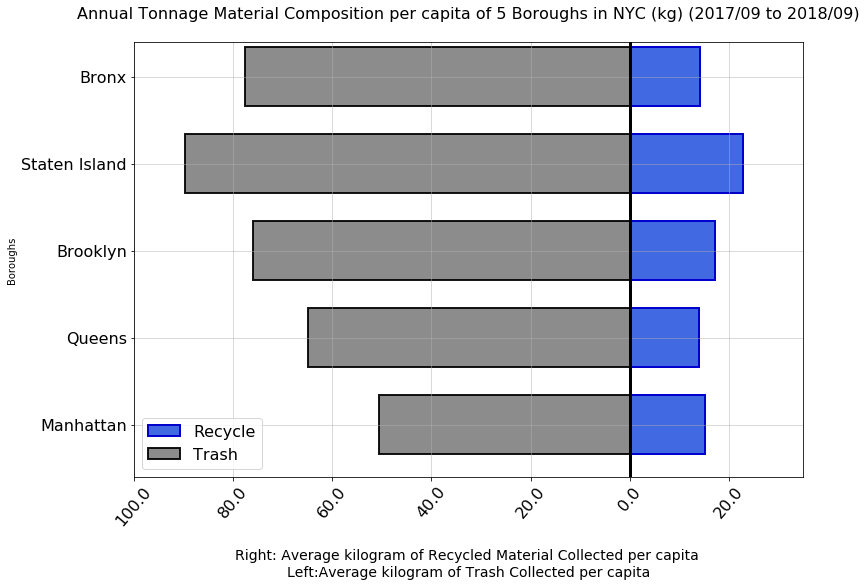

In [33]:
# The coloured bars are not easy to interpret the two categories and therefore, I am changing colour. 
x1=nyc.ix[:4,1]
x2=nyc.ix[:4,2]

# Bar labels for each borough
bar_labels = ['Manhattan','Queens', 'Brooklyn', 'Staten Island', 'Bronx']

plt.figure(figsize=(12,8))

# Set the y position
y_pos = np.arange(len(x1))
plt.yticks(y_pos, bar_labels, fontsize=12)


width = 0.68

# Create a horizontal bar in the position y_pos
color_dict={'#2E8B57','#FFB6C1','#D2691E', '#6495ED', '#8B008B'}
bx=plt.barh(y_pos[4], x1[0], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
si=plt.barh(y_pos[3], x1[1], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
qns=plt.barh(y_pos[2], x1[2], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
bk=plt.barh(y_pos[1], x1[3], width,align='center', color='#4169E1',linewidth=2, edgecolor='#0000CD')
mn=plt.barh(y_pos[0], x1[4], width, align='center', color='#4169E1',linewidth=2, edgecolor='#0000CD')

bx_t=plt.barh(y_pos[4], -x2[0], width, align='center', color='#808080', alpha=0.9,linewidth=2, edgecolor='#000000')
si_t=plt.barh(y_pos[3], -x2[1], width, align='center', color='#808080', alpha=0.9,linewidth=2, edgecolor='#000000')
qns_t=plt.barh(y_pos[2], -x2[2], width, align='center', color='#808080', alpha=0.9,linewidth=2, edgecolor='#000000')
bk_t=plt.barh(y_pos[1], -x2[3], width, align='center', color='#808080', alpha=0.9,linewidth=2, edgecolor='#000000')
mn_t=plt.barh(y_pos[0], -x2[4], width, align='center', color='#808080', alpha=0.9,linewidth=2, edgecolor='#000000')





# labels

plt.xlabel('\nRight: Average kilogram of Recycled Material Collected per capita \nLeft:Average kilogram of Trash Collected per capita', horizontalalignment='center',fontsize=14)
t = plt.title('Annual Tonnage Material Composition per capita of 5 Boroughs in NYC (kg) (2017/09 to 2018/09)\n', 
              fontsize=16)

plt.ylabel('Boroughs')
plt.xlim([-100,35])
plt.xticks(rotation=50, fontsize=16)

# Set positive value on both side of the 0. 
# Reference: https://stackoverflow.com/questions/20393663/convert-negative-y-axis-to-positive-matplotlib
ax = plt.axes()
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])
plt.ylim([-0.6, 4.4])
plt.yticks(fontsize=16)
#plt.legend(bar_labels, fontsize=13,loc=1)

plt.plot([0,0],[-0.8,4.4], 'k', linewidth=3)

plt.legend((bx,bx_t),['Recycle', 'Trash'], fontsize=16)

plt.grid(alpha=0.6)

plt.show()

## Caption:
This bar plot demonstrates the annual average weight of trash and recycled material of collected per capita of the five boroughs of New York City. The measurement unit is in kilogram. Population data used was from 2010. The bar chart shows that way more trash has been produced per capita on an annual basis than recycled material. Recycled material is a sum of both paper and metal&glass collected. Manhattan borough residents shows the least trash collected while Staten Island residents generates the most trash and recycling material. 

## Reference:
Albon, C. (2018). Back to Back Bar plot. Retrieved from: https://chrisalbon.com/python/data_visualization/matplotlib_back_to_back_bar_plot/

Matplotlib.org. (2018). Barchart. Retrieved from: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html